In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('F:\StudentsPerformance.csv')
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [4]:
df['gender'].dtypes   #returns dtype of a column


dtype('O')

In [5]:
df.dtypes    #return dtypes of eveery column

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
df.rename(columns={'math score':'math_score','parental level of education':'parental_level_of_education',
                   'reading score':'reading_score','test preparation course':'test_prep_course',
                   'writing score':'writing_score'},inplace=True)        #removing spaces in name by renaming it
df.isna()  #returns true or false if there is nan
df['lunch'].isna()


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Name: lunch, Length: 1000, dtype: bool

In [7]:

df['math_score']=df['math_score'].astype(str)
print(df['math_score'].dtypes)
df['math_score']=df['math_score'].astype(int)
df['math_score'].dtypes

object


dtype('int32')

In [8]:
print(df)

     gender race/ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

In [9]:
print(max( df['writing_score']) )
print(min( df['writing_score'])  )

100
10


In [10]:
width=(     max( df['writing_score'])-min( df['writing_score'])  )/5
width=int(width)
print(width)

18


In [40]:
bins=range(min(df['writing_score'])   ,max (df['writing_score'])+width , width  )
print(bins)
gr_names=['very low','low','high','med','very high']
df['score_bins']=pd.cut(df['writing_score'],bins,True,labels=gr_names)

range(10, 118, 18)


In [12]:
pd.get_dummies(df['gender'])

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
6,1,0
7,0,1
8,0,1
9,1,0


In [13]:
df['math_score'].mean() #geting mean over math_score


66.089

In [14]:
#print(df.head(3))
def gentoint(exp):
    if exp=='male':
        return 'm'
    if exp=='female':
        return 'f'
df['gender']=df['gender'].apply(gentoint)#apply can be used for columns,but df.applymap(function) is for whole datafrme


,gender,race/ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score,score_bins
0,f,group B,bachelor's degree,standard,none,72,72,74,med
1,f,group C,some college,standard,completed,69,90,88,very high
2,f,group B,master's degree,standard,none,90,95,93,very high


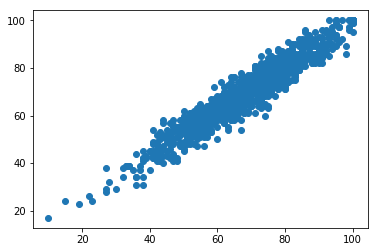

In [24]:
import matplotlib.pyplot as plt
y=df['reading_score']
x=df['writing_score']
plt.scatter(x,y)
df.head(3)

In [16]:
df[ (df['race/ethnicity']=='group A')& ( df['gender']=='f') ].math_score.mean()#returns mean of marks if female and of group A
df[ (df['race/ethnicity']=='group A') ].math_score.mean()
#or we can do this
df.groupby(['race/ethnicity'] ).writing_score.mean()
df.groupby(['test_prep_course']).writing_score.agg(['count','max','min','mean']) 
df.groupby(['parental_level_of_education']).reading_score.agg(['count','max','min','mean']) #finding reading_score's count,max,min,mean judged on parental level of eduction
df.groupby(['parental_level_of_education']).agg(['mean','min','max'])

math_score          reading_score           \
                                  mean min  max          mean min  max   
parental_level_of_education                                              
associate's degree           67.882883  26  100     70.927928  31  100   
bachelor's degree            69.389831  29  100     73.000000  41  100   
high school                  62.137755   8   99     64.704082  24   99   
master's degree              69.745763  40   95     75.372881  42  100   
some college                 67.128319  19  100     69.460177  23  100   
some high school             63.497207   0   97     66.938547  17  100   

                            writing_score           
                                     mean min  max  
parental_level_of_education                         
associate's degree              69.896396  35  100  
bachelor's degree               73.381356  38  100  
high school                     62.448980  15  100  
master's degree                 75.677966  46  100  
some college                    68.840708  19   99  
some high school                64.888268  10  100

In [17]:
df.groupby(['gender','parental_level_of_education']).mean()
df.groupby(['gender','parental_level_of_education']).agg(['mean','max','min'])

math_score          reading_score           \
                                         mean  max min          mean  max min   
gender parental_level_of_education                                              
f      associate's degree           65.250000  100  26     74.120690  100  31   
       bachelor's degree            68.349206  100  29     77.285714  100  41   
       high school                  59.351064   99   8     68.202128   99  24   
       master's degree              66.500000   94  40     76.805556  100  53   
       some college                 65.406780  100  19     73.550847  100  38   
       some high school             59.296703   97   0     69.109890  100  17   
m      associate's degree           70.764151  100  40     67.433962  100  37   
       bachelor's degree            70.581818  100  37     68.090909  100  42   
       high school                  64.705882   94  27     61.480392   91  24   
       master's degree              74.826087   95  46     73.130435   89  42   
       some college                 69.009259  100  28     64.990741   97  23   
       some high school             67.840909   94  30     64.693182   88  26   

                                   writing_score           
                                            mean  max min  
gender parental_level_of_education                         
f      associate's degree              74.000000  100  38  
       bachelor's degree               78.380952  100  38  
       high school                     66.691489  100  23  
       master's degree                 77.638889  100  54  
       some college                    74.050847   99  32  
       some high school                68.285714  100  10  
m      associate's degree              65.405660   95  35  
       bachelor's degree               67.654545  100  38  
       high school                     58.539216   86  15  
       master's degree                 72.608696   90  46  
       some college                    63.148148   99  19  
       some high school                61.375000   87  22

In [18]:
dg=df[ ['gender','math_score','race/ethnicity'] ]
dgr=dg.groupby(['gender','race/ethnicity'],as_index=False).mean()
dp=dgr.pivot(index='gender',columns='race/ethnicity')
dp
#dp=dg.pivot(index='gender',columns='race/ethnicity')

math_score                                            
race/ethnicity    group A    group B    group C    group D    group E
gender                                                               
f               58.527778  61.403846  62.033333  65.248062  70.811594
m               63.735849  65.930233  67.611511  69.413534  76.746479

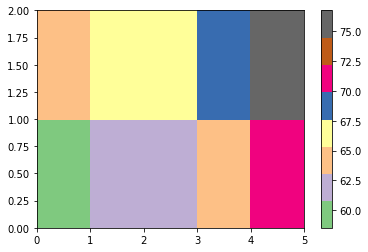

In [19]:
import matplotlib.pyplot as plt
plt.pcolor(dp,cmap='Accent')
plt.colorbar()
plt.show()

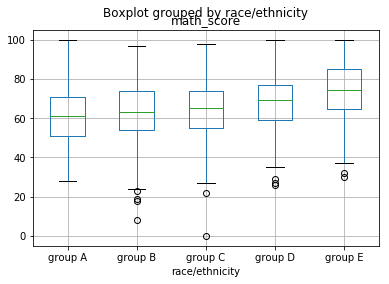

In [20]:
df.boxplot('math_score','race/ethnicity')

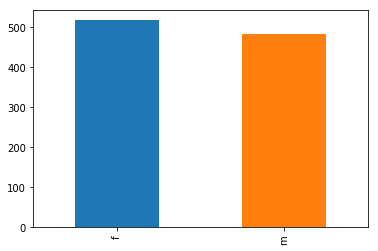

In [37]:
#( df['gender'].value_counts()/len(df['gender']) ).plot.bar()
df['gender'].value_counts().plot.bar()

Text(0.5, 0, 'math_score')

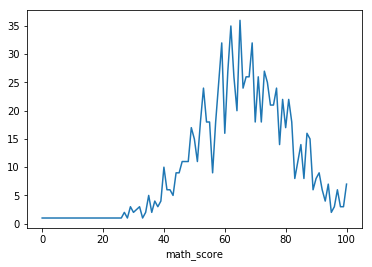

In [38]:
dp=df['math_score'].value_counts().sort_index().plot.line()
dp.set_xlabel('math_score')

c:\users\91885\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


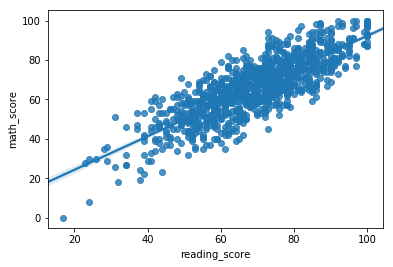

In [39]:
import seaborn as sns
sns.regplot(x='reading_score',y='math_score',data=df)